In [152]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import and Inspect the Data.

In [64]:
data = pd.read_csv('F:\Desktop\self_study\dataSets\Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Take a closer look at the data defined as string that seem to be integers

In [66]:
data['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [67]:
data['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [68]:
data['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

# Data Cleaning

#### so we need to deal with '?' first in our data that represent a null values

In [70]:
data.replace('?',np.nan, inplace=True)

In [71]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Now we can hundle missing values

In [72]:
#setup the imputers
imputerMean = SimpleImputer(strategy='mean')
imputerMode = SimpleImputer(strategy='most_frequent')

In [73]:
data[['normalized-losses','bore','stroke','num-of-doors','horsepower','peak-rpm','price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  164 non-null    object
 1   bore               201 non-null    object
 2   stroke             201 non-null    object
 3   num-of-doors       203 non-null    object
 4   horsepower         203 non-null    object
 5   peak-rpm           203 non-null    object
 6   price              201 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


In [74]:
data['normalized-losses'] = imputerMean.fit_transform(data[['normalized-losses']])
data['bore'] = imputerMean.fit_transform(data[['bore']])
data['stroke'] = imputerMean.fit_transform(data[['stroke']])
data['num-of-doors'] = imputerMode.fit_transform(data[['num-of-doors']])
data['horsepower'] = imputerMean.fit_transform(data[['horsepower']])
data['peak-rpm'] = imputerMean.fit_transform(data[['peak-rpm']])
data['price'] = imputerMean.fit_transform(data[['price']])

In [75]:
data[['normalized-losses','bore','stroke','num-of-doors','horsepower','peak-rpm','price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   bore               205 non-null    float64
 2   stroke             205 non-null    float64
 3   num-of-doors       205 non-null    object 
 4   horsepower         205 non-null    float64
 5   peak-rpm           205 non-null    float64
 6   price              205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


### check duplication

In [76]:
data.duplicated().any()

False

## Grouping

In [183]:
GroupedData1 = data[['drive-wheels','price']].groupby(['drive-wheels'],as_index=False)
GroupedData1.mean()

,drive-wheels,price
0,4wd,10570.569928
1,fwd,9310.818823
2,rwd,19671.422755


In [184]:
GroupedData2 = data[['body-style','price']].groupby(['body-style'],as_index=False)
GroupedData2.mean()

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10050.289410
3,sedan,14433.658945
4,wagon,12371.960000


In [137]:
GroupedResult = data[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
GroupedResult

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


#### The grouped data is much easier to visualize when it is made into a pivot table.

In [139]:
GroupedPivot = GroupedResult.pivot(index='drive-wheels',columns='body-style')
GroupedPivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [142]:
GroupedPivot = GroupedPivot.fillna(0) #fill missing values with 0
GroupedPivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'price-convertible'),
  Text(1.5, 0, 'price-hardtop'),
  Text(2.5, 0, 'price-hatchback'),
  Text(3.5, 0, 'price-sedan'),
  Text(4.5, 0, 'price-wagon')])

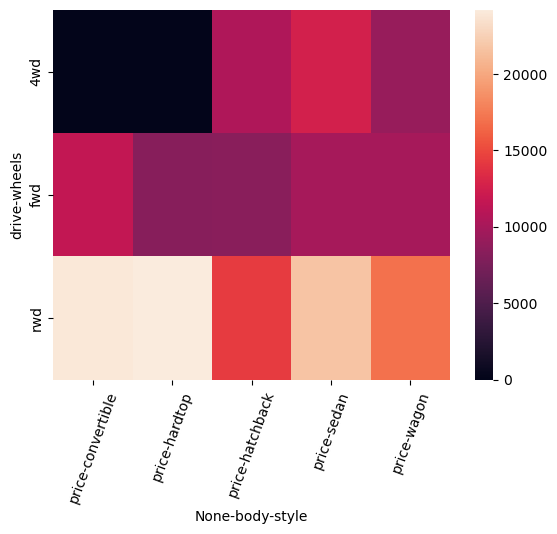

In [151]:
sns.heatmap(GroupedPivot,)
plt.xticks(rotation=70)

## Correlation and Causation

In [162]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


In [163]:
data[['wheel-base','length','width','curb-weight','bore','horsepower','city-mpg','highway-mpg','price']].corr()

,wheel-base,length,width,curb-weight,bore,horsepower,city-mpg,highway-mpg,price
wheel-base,1.000000,0.874587,0.795144,0.776386,0.488760,0.351957,-0.470414,-0.544082,0.583168
length,0.874587,1.000000,0.841118,0.877728,0.606462,0.554434,-0.670909,-0.704662,0.682986
width,0.795144,0.841118,1.000000,0.867032,0.559152,0.642195,-0.642704,-0.677218,0.728699
curb-weight,0.776386,0.877728,0.867032,1.000000,0.648485,0.750968,-0.757414,-0.797465,0.820825
bore,0.488760,0.606462,0.559152,0.648485,1.000000,0.575737,-0.584508,-0.586992,0.532300
horsepower,0.351957,0.554434,0.642195,0.750968,0.575737,1.000000,-0.803162,-0.770903,0.757917
city-mpg,-0.470414,-0.670909,-0.642704,-0.757414,-0.584508,-0.803162,1.000000,0.971337,-0.667449
highway-mpg,-0.544082,-0.704662,-0.677218,-0.797465,-0.586992,-0.770903,0.971337,1.000000,-0.690526
price,0.583168,0.682986,0.728699,0.820825,0.532300,0.757917,-0.667449,-0.690526,1.000000


In [164]:
correlatedData = data[['wheel-base','length','width','curb-weight','bore','horsepower','city-mpg','highway-mpg']]

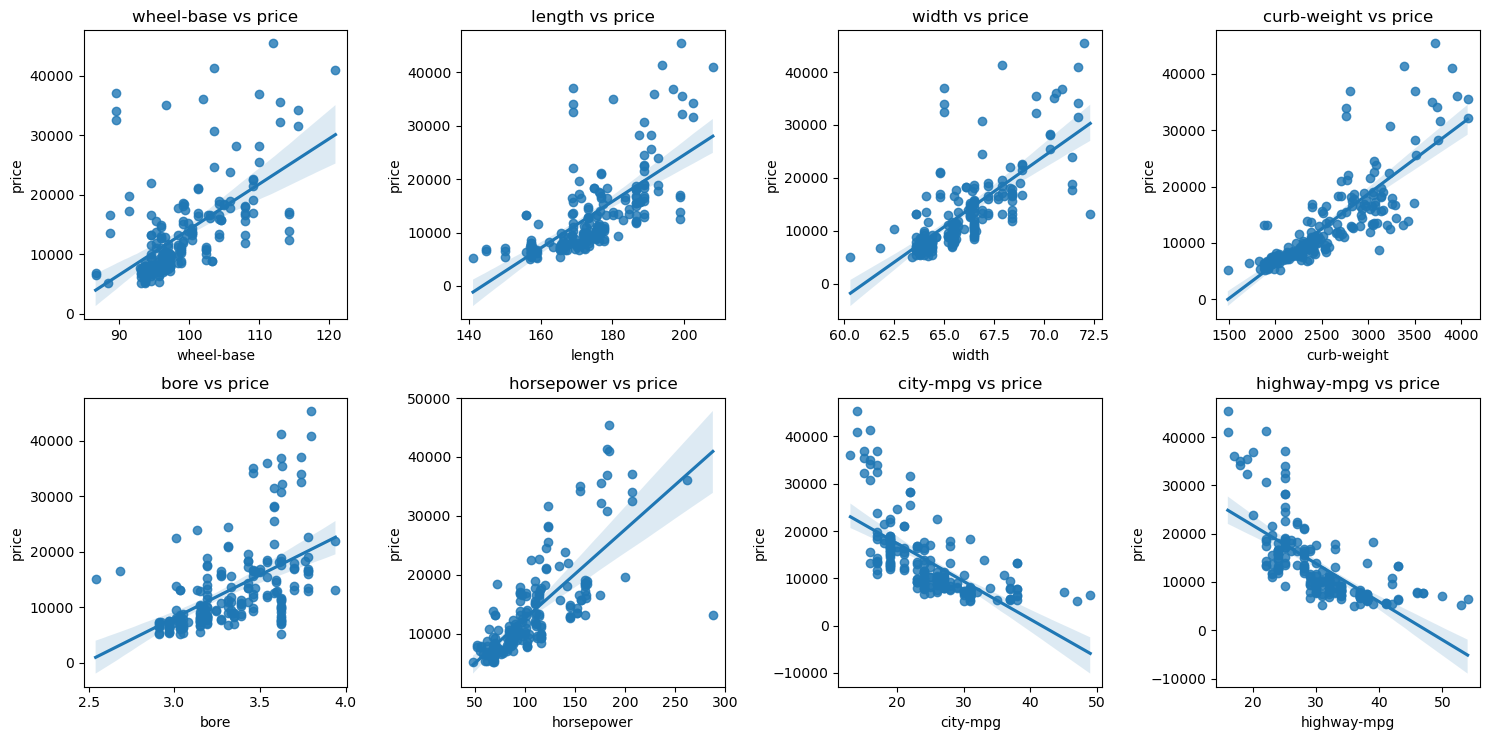

In [165]:
fig, axes = plt.subplots(2, 4, figsize=(15,  7.5))


axes = axes.flatten()


for idx, column in enumerate(correlatedData):
    sns.regplot(x=column, y='price', data=data, ax=axes[idx])
    axes[idx].set_title(f'{column} vs price')
    

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
    

<h3>Wheel-Base vs. Price</h3>


In [172]:
pearson_coef , p_value  = stats.pearsonr(data['wheel-base'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5831681499789547  with a P-value of P = 4.527625545686765e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>

<h3>horsepower vs. Price</h3>

In [173]:
pearson_coef , p_value  = stats.pearsonr(data['horsepower'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7579169537498174  with a P-value of P = 1.607670397813262e-39


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, although the linear relationship is quite strong ((~0.757).</p>

<h3>length vs. Price</h3>

In [175]:
pearson_coef , p_value  = stats.pearsonr(data['length'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6829862954386214  with a P-value of P = 1.6498873291220412e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, although the linear relationship is quit strong (~0.682).</p>

<h3>width vs. Price</h3>

In [158]:
pearson_coef , p_value  = stats.pearsonr(data['width'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7286988175931839  with a P-value of P = 3.214520483804664e-35


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between width and price is statistically significant, although the linear relationship is quit strong (~0.728).</p>

<h3>curb-weight vs. Price</h3>

In [159]:
pearson_coef , p_value  = stats.pearsonr(data['curb-weight'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8208247333547289  with a P-value of P = 2.866332107027338e-51


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, although the linear relationship is very strong (~0.820 close to 1).</p>

<h3>engine-size vs. Price</h3>

In [160]:
pearson_coef , p_value  = stats.pearsonr(data['engine-size'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8617522436859718  with a P-value of P = 9.669661923636975e-62


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, although the linear relationship is very strong (~0.861 close to 1).</p>

<h3>bore vs. Price</h3>

In [161]:
pearson_coef , p_value  = stats.pearsonr(data['bore'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5323000195387404  with a P-value of P = 2.1398306512856854e-16


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, although the linear relationship isn't extremely strong (~0.532).</p>

<h3>highway-mpg vs. Price</h3>

In [171]:
pearson_coef , p_value  = stats.pearsonr(data['highway-mpg'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6905257341183484  with a P-value of P = 2.232467405837684e-30


<h4>Conclusion:</h4>
<p>Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.690 shows that the relationship is negative and moderately strong.</p>

## Categorical Values

In [178]:
data.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,116,96,120,202,148,159,94


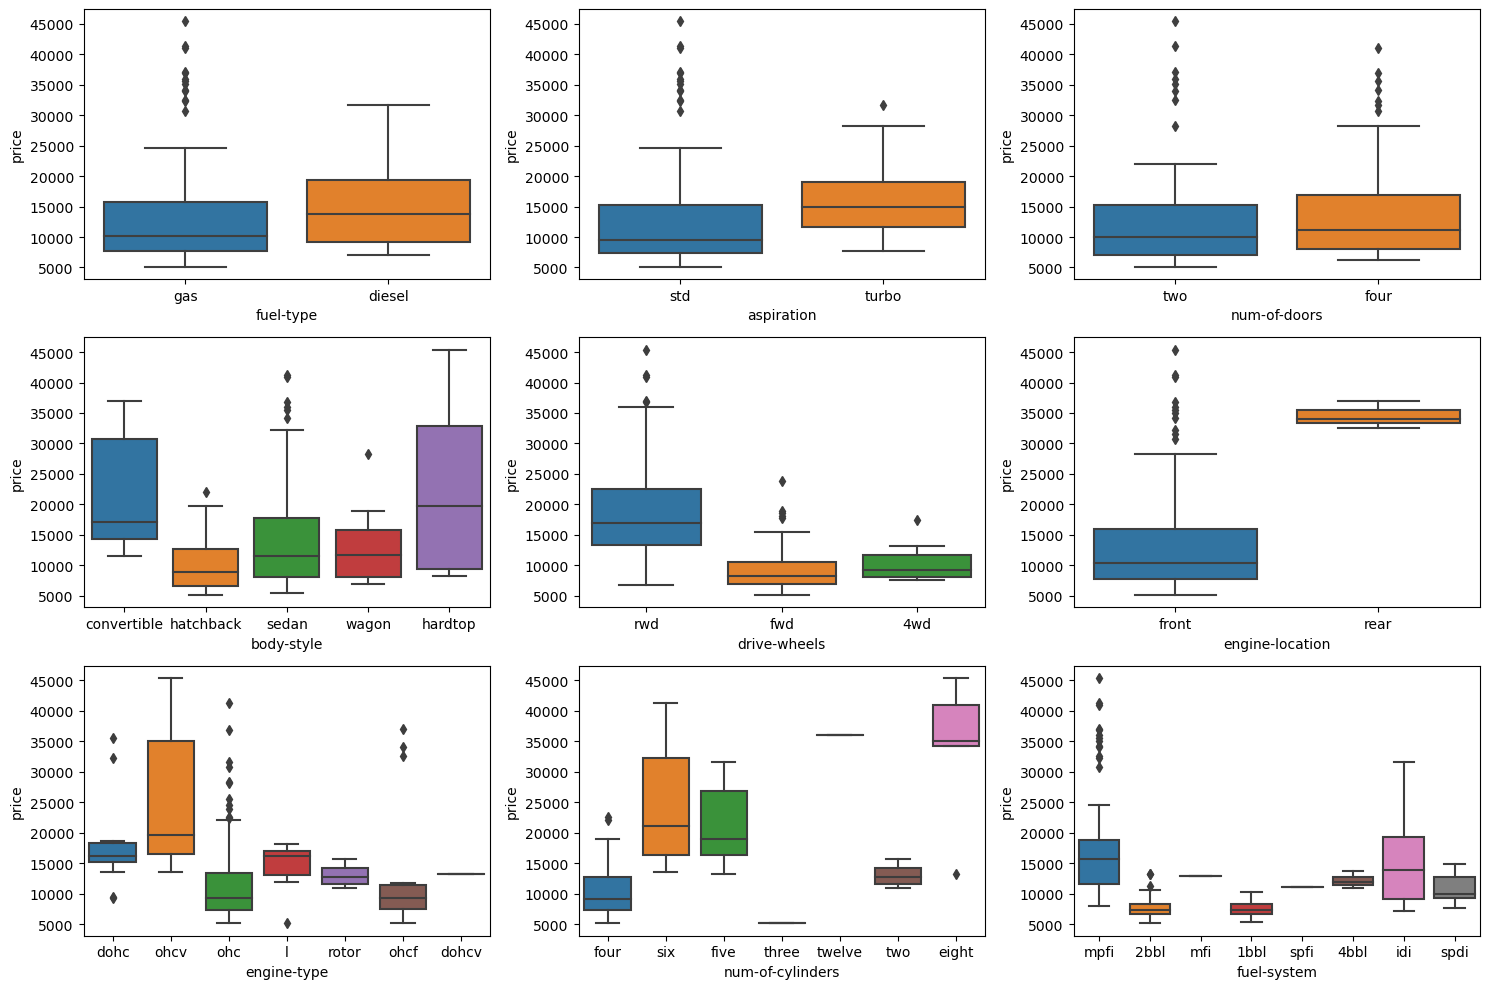

In [167]:
CateData = data[data.describe(include=['object']).columns]
CateData = CateData.drop("make", axis='columns')

fig, axes = plt.subplots(3, 3, figsize=(15,10))


axes = axes.flatten()


for idx, column in enumerate(CateData):
    
    sns.boxplot(x=column, y="price", data=data,ax=axes[idx])
    

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
    

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


<p>And we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


In [181]:
drive_wheels_counts = data['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


In [182]:
# engine-location as variable
engine_loc_counts = data['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location' : 'value_counts'},inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,202
rear,3


 <p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 202 with an engine in the front, so this result is skewed.</p>


### ANOVA

#### ANOVA: Analysis of Variance

In [187]:
GroupedData1.head(2)

,drive-wheels,price
0,rwd,13495.000000
1,rwd,16500.000000
3,fwd,13950.000000
4,4wd,17450.000000
5,fwd,15250.000000
9,4wd,13207.129353


In [188]:
GroupedData1.nunique()

,drive-wheels,price
0,4wd,9
1,fwd,107
2,rwd,75


We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [190]:
f_val , p_val = stats.f_oneway(GroupedData1.get_group('4wd')['price']
                              ,GroupedData1.get_group('fwd')['price']
                              ,GroupedData1.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.50366682669116 , P = 3.539270791604857e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

Let's examine them separately.


#### fwd and rwd


In [191]:
f_val , p_val = stats.f_oneway(GroupedData1.get_group('fwd')['price']
                              ,GroupedData1.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 129.41115759339715 , P = 2.6524240289951807e-23


#### 4wd and rwd


In [ ]:
f_val , p_val = stats.f_oneway(GroupedData1.get_group('4wd')['price']
                              ,GroupedData1.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

#### fwd and 4wd


In [193]:
f_val , p_val = stats.f_oneway(GroupedData1.get_group('fwd')['price']
                              ,GroupedData1.get_group('4wd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 1.1847736755700733 , P = 0.27844756008434524


we notice that ANOVA for the categories `4wd` and `fwd` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same

<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>